<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="Logo HEIG-VD" style="width: 80px;" align="right"/>

# Cours APN - Labo 1 : Groupement de clients avec _k_-moyennes

Le but de ce laboratoire est de diviser en groupes cohérents les clients d'un centre commercial, en utilisant la méthode des [_k_-moyennes implémentée dans Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Les données viennent de Kaggle: [Mall Customer Segmentation](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python) (fournies avec le notebook).  Il n'y a pas d'annotation de référence des groupes, donc ce sera à vous de juger leur qualité grâce à la visualisation.  

Le travail comporte les étapes suivantes :
1. Analyse exploratoire des données.
2. Application simple des _k_-moyennes en 2D.
3. Améliorations: optimisation du nombre de groupes, 3D.

Veuillez répondre aux questions de chaque étape en écrivant d'abord les commandes nécessaires, puis en commentant le résultat si nécessaire.

Il est conseillé de créer un nouvel environnement Conda pour le cours d'APN, par exemple en utilisant la commande `conda create -n cours_apn --file requirements.txt`.  Le fichier _requirements.txt_ fourni avec le notebook liste les packages à installer. 

***
**NOM et prénom :** 
***

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

## 1. Analyse exploratoire des données

Veuillez lire les données du fichier `Mail_Customers.csv` dans une *data frame* Pandas nommée `clients_df` et examinez-la.  Veuillez répondre aux questions suivantes en utilisant les commandes appropriées.

a. Combien de clients figurent dans les données ?<br>
b. Combien d'attributs y a-t-il pour chaque client ?  Quels sont leurs noms ?<br>
c. Y a-t-il des données manquantes ?<br>
d. Quel est le *5 number summary* pour chaque attribut?

In [2]:
clients_df = pd.read_csv("Mall_Customers.csv", index_col="CustomerID")
print(f"Nombre de clients: {len(clients_df)}")
print(f"""Attributs : {len(clients_df.columns)} ({", ".join(clients_df.columns)})""")
print(f"Nombre de valeurs manquantes: {clients_df.isna().sum().sum()}")
print("Résumé des attributs:")
clients_df.describe().loc[["min", "25%", "50%", "75%", "max"]]

Nombre de clients: 200
Attributs : 4 (Gender, Age, Annual Income (k$), Spending Score (1-100))
Nombre de valeurs manquantes: 0
Résumé des attributs:


,Age,Annual Income (k$),Spending Score (1-100)
min,18.00,15.0,1.00
25%,28.75,41.5,34.75
50%,36.00,61.5,50.00
75%,49.00,78.0,73.00
max,70.00,137.0,99.00


In [3]:
INCOME = "Annual Income (k$)"
SPENDING = "Spending Score (1-100)"

**a)** Il y a 200 clients

**b)** Il y a 4 attributs, dont 3 numériques (voir ci-dessus) et un discret (le genre)

**c)** Il n'y a pas de données manquantes

**d)** Voir ci-dessus

e. Combien de personnes sont des femmes, et combien des hommes ?<br>
f. Quel est le revenu annuel moyen par sexe ? Quel est le *spending score* moyen par sexe ?<br>
g. Quelles sont les valeurs extrêmes de l'âge pour les femmes ? Et pour les hommes ?<br>
h. Même question pour le revenu annuel, puis pour le *spending score*.<br>

In [4]:
print("Répartition homme/femme:")
print(clients_df["Gender"].value_counts())

print("Revenu et 'spending score' moyen par genre:")
print(clients_df.groupby("Gender").mean()[["Annual Income (k$)", "Spending Score (1-100)"]])

print("Valeurs minimales par genre:")
print(clients_df.groupby("Gender").min())

print("Valeurs maximales par genre:")
print(clients_df.groupby("Gender").max())

Répartition homme/femme:
Female    112
Male       88
Name: Gender, dtype: int64
Revenu et 'spending score' moyen par genre:
        Annual Income (k$)  Spending Score (1-100)
Gender                                            
Female           59.250000               51.526786
Male             62.227273               48.511364
Valeurs minimales par genre:
        Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                 
Female   18                  16                       5
Male     18                  15                       1
Valeurs maximales par genre:
        Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                 
Female   68                 126                      99
Male     70                 137                      97


**e)** Il y a 112 femmes et 88 hommes

**f)** Les revenus et 'spending score' moyens pour les hommes et les femmes sont respectivement \\$62'000 et 48 ainsi que \\$59'000 et 51

**g)** Pour les hommes et les femmes l'âge minimum est 18 ans. Les ages maximums sont respectivement 70 et 68 ans.

**h)**
Les revenus minimums sont respectivement \\$15'0000 et \\$16'000, les revenus maximums \\$137'000 et \\$126'000. Pour les 'spending score' les miminums sont 1 et 5, les maximums 97 et 99.

## 2. Groupement simple avec la méthode des k-moyennes

### 2a. Groupement avec deux attributs, en trois groupes

Pour commencer, veuillez utiliser la méthode [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) avec initialisation aléatoire, un seul essai, et en fixant le nombre de groupes à trois (3).  De plus, veuillez utiliser seulement les colonnes 'Annual Income (k$)' et 'Spending Score (1-100)' des données.

In [5]:
kmeans = KMeans(n_clusters=3, init="random", n_init=1).fit(clients_df[["Annual Income (k$)", "Spending Score (1-100)"]])
groups = kmeans.predict(clients_df[["Annual Income (k$)", "Spending Score (1-100)"]])

clients_df["Group"] = groups

Veuillez afficher les données en 2D (_annual income_ et _spending score_) en indiquant l'appartenance aux clusters par des couleurs différentes.  Veuillez utiliser des marqueurs différents pour les hommes et pour les femmes.

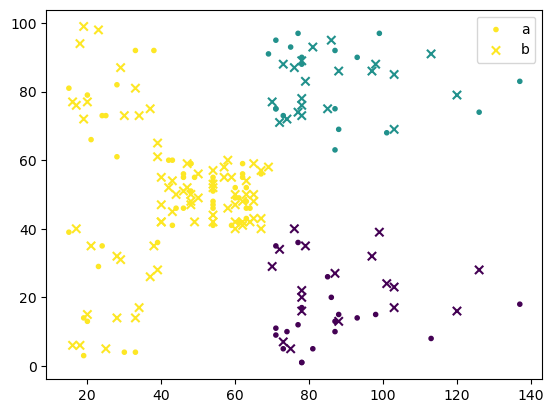

In [6]:
men = clients_df[clients_df["Gender"] == "Male"]
women = clients_df[clients_df["Gender"] == "Female"]

plt.scatter(men[INCOME], men[SPENDING], c=men["Group"], marker=".", label="Hommes")
plt.scatter(women[INCOME], women[SPENDING], c=women["Group"], marker="x", label="Femmes")

plt.legend(['a', 'b', 'c'])

**Question :** comment appréciez-vous la qualité du groupement obtenu ?  Veuillez la discuter. 

In [7]:
# Vos commentaires ici:


### 2b. Choix individuel d'un nombre de groupes plus adapté

Sur la base de la question précédente, veuillez effectuer le groupement avec le nombre de groupes qui vous semble le plus adapté, autre que 3.  Veuillez effectuer 10 initialisations aléatoires.

Pour l'affichage, veuillez afficher également les centroïdes des groupes (obtenus de `KMeans`), en utilisant une étoile noire. 

In [23]:
kmeans = KMeans(n_clusters=5, init="random", n_init=10).fit(clients_df[[INCOME, SPENDING]])
groups = kmeans.predict(clients_df[[INCOME, SPENDING]])

clients_df["Group"] = groups
centroids = kmeans.cluster_centers_

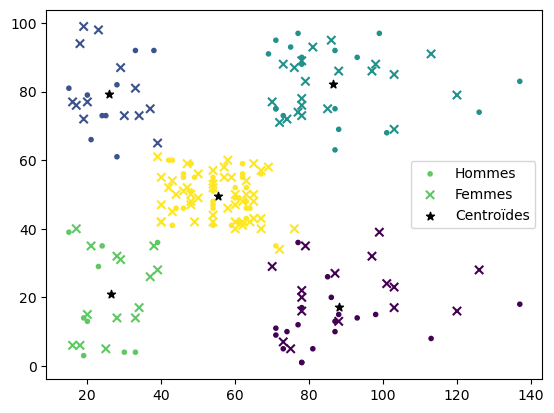

In [24]:
men = clients_df[clients_df["Gender"] == "Male"]
women = clients_df[clients_df["Gender"] == "Female"]

plt.scatter(men[INCOME], men[SPENDING], c=men["Group"], marker=".", label="Hommes")
plt.scatter(women[INCOME], women[SPENDING], c=women["Group"], marker="x", label="Femmes")
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], c="black", marker="*")

plt.legend(["Hommes", "Femmes", "Centroïdes"])

**Question :** comment appréciez-vous la qualité du nouveau groupement ?  Veuillez la discuter. 
    
Pouvez-vous décrire chaque groupe en fonction des valeurs des deux axes ?

In [10]:
# Vos commentaires ici, si nécessaire:


## 3. Groupements optimisés en 3D

Dans cette section, vous allez utiliser l'initialisation k-means++ (un seul tirage), et optimiser le nombre de groupes par la méthode du coude (_elbow_).  Puis, vous allez ajouter la dimension de l'âge et afficher les groupes en 3D.

### 3a. Méthode du coude et initialisation k-means++

Dans tout ce qui suit, vous allez initialiser les centroïdes avec k-means++ (paramètre `init`) et exécuter 5 fois l'algorithme des k-moyennes (paramètre `n_init`).

Veuillez afficher les valeurs du coefficient WSS (Within-cluster Sum of Squares) ou **inertie** pour un nombre de groupes variant de 1 à 9.  Travaillez pour l'instant en deux dimensions, comme avant.

In [11]:
# Votre code ici:


**Question :** quel est le nombre de groupes qui est optimal d'après cette méthode ?

In [12]:
# Votre réponse ici:


Veuillez effectuer le groupement avec le nombre de groupes optimal et les paramètres indiqués pour cette section.  

Veuillez **afficher le résultat** avec le même format que dans la figure précédente.

In [13]:
# Votre code ici:


**Question :** comment se compare ce groupement à celui obtenu au 2b ?

In [14]:
# Votre réponse ici:


Veuillez calculer le nombre de femmes et d'hommes, respectivement, dans chaque groupe.  Dans quels groupes y a-t-il plus d'hommes que de femmes, et quelles sont les propriétés de ces groupes (revenu, score) ?

In [15]:
# Votre code ici:


In [16]:
# Votre réponse ici:


### 3b. Groupement utilisant 3 attributs

Veuillez utiliser à partir de maintenant aussi l'attribut de l'âge.  Veuillez déterminer le nombre optimal de groupes par la méthode du coude, et garder l'initialisation k-means++ avec 5 exécutions.  Dans cette section, on vous demande aussi d'afficher les groupes en 3D.

In [17]:
# Votre code ici:


In [18]:
# Votre code ici:


**Question :** comment se compare ce groupement à celui obtenu au 2b ?

In [19]:
# Votre réponse ici:


**Question :** serait-il difficile d'ajouter le paramètre 'Gender' (avec les valeurs 'Male' et 'Female') comme 4e attribut pour effectuer le groupement ?  Veuillez discuter la pertinence de cette idée.

In [20]:
# Votre réponse ici:


***
**Fin du Labo 1.**  Veuillez nettoyer ce notebook en gardant seulement les réponses et résultats désirés, l'enregistrer en remplaçant 'student' par votre nom, et le soumettre sur Cyberlearn.